![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


# Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


# Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('vgsales.csv')
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [46]:
df['Name'].unique().shape

(11358,)

Qual foi o jogo mais vendido no mundo em 2010?



In [47]:
mais_vendido_2010 = df[[ 'Name', 'Year', 'Global_Sales']]
mais_vendido_2010 = mais_vendido_2010[mais_vendido_2010['Year'].isin([2010])]
mais_vendido_2010.head(3)

,Name,Year,Global_Sales
11183,Kinect Adventures!,2010,21.82
11184,Pokemon Black/Pokemon White,2010,15.32
11185,Call of Duty: Black Ops,2010,14.64


In [48]:
indice_max = mais_vendido_2010['Global_Sales'].idxmax() #11183
mais_vendido_2010.loc[indice_max]

Name            Kinect Adventures!
Year                          2010
Global_Sales                 21.82
Name: 11183, dtype: object

Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


In [49]:
df_filtro_ano = df[(df['Year'] >= 2005) & (df['Year'] <= 2016)]
df_filtro_ano.sample(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11128,16128,Tantei Jinguuji Saburo DS: Fuserareta Shinjitsu,DS,2009,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01
10716,11393,Meitantei Conan & Kindaichi Shounen no Jikenbo...,DS,2009,Adventure,Namco Bandai Games,0.00,0.00,0.08,0.00,0.08
14356,2776,LEGO Marvel Super Heroes,WiiU,2013,Action,Warner Bros. Interactive Entertainment,0.31,0.35,0.02,0.06,0.74


In [50]:
df_filtro_ano['Publisher'].unique()

array(['Nintendo', 'Take-Two Interactive', 'Electronic Arts',
       'Sony Computer Entertainment', 'Square Enix',
       'Konami Digital Entertainment', 'Namco Bandai Games', 'Capcom',
       'LucasArts', 'Eidos Interactive', 'Sega', 'THQ', 'Activision',
       'RedOctane', 'Ubisoft', 'Vivendi Games', 'Atari', 'Tecmo Koei',
       'Microsoft Game Studios', nan, 'Unknown',
       'Disney Interactive Studios', 'Midway Games',
       'Sony Online Entertainment', 'Banpresto', 'SouthPeak Games',
       'Ignition Entertainment', 'Rising Star Games', 'NovaLogic',
       'Jester Interactive', 'Jack of All Games',
       'Zoo Digital Publishing', 'Global Star', 'Oxygen Interactive',
       'Tomy Corporation', 'Marvelous Interactive', 'Codemasters',
       'ValuSoft', 'Play It', 'Hudson Soft', 'Crave Entertainment',
       'Xplosiv', '505 Games', 'Essential Games', 'DSI Games',
       'DTP Entertainment', 'Deep Silver', 'Ghostlight', 'D3Publisher',
       'Bethesda Softworks', 'XS Games', 'Play

In [51]:
vendas_por_empresa = pd.DataFrame(df_filtro_ano.groupby('Publisher')['Global_Sales'].sum())
# vendas_por_empresa

empresa_que_mais_vendeu = vendas_por_empresa.idxmax().values[0] #sem o .values[0] estava aparecendo mais informações
max_vendas = vendas_por_empresa.max().values[0]

print(f"A empresa que mais vendeu de 2005 a 2016 foi: {empresa_que_mais_vendeu} com {max_vendas} em vendas.")

A empresa que mais vendeu de 2005 a 2016 foi: Nintendo com 958.43 em vendas.


<Figure size 2000x1000 with 0 Axes>

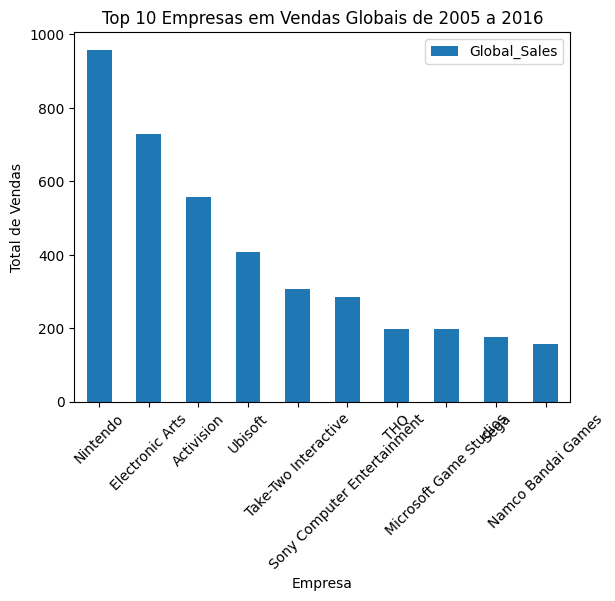

In [52]:
# para o gráfico não ficar poluído plotei só as 10 maiores empresas.
top_10_vendas_por_empresa = vendas_por_empresa.nlargest(10, 'Global_Sales')

plt.figure(figsize=(20, 10))
top_10_vendas_por_empresa.plot(kind='bar')
plt.title('Top 10 Empresas em Vendas Globais de 2005 a 2016')
plt.xlabel('Empresa')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()


Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


In [53]:
menos_vendido_2008 = df[[ 'Name', 'Year', 'Genre','Global_Sales']]

menos_vendido_2008 = menos_vendido_2008[menos_vendido_2008['Genre'].isin(['Sports'])]

menos_vendido_2008 = menos_vendido_2008[menos_vendido_2008['Year'].isin([2008])]
# menos_vendido_2008.sample(3)

indice_min = menos_vendido_2008['Global_Sales'].idxmin() 
menos_vendido_2008.loc[indice_min]


Name            Winning Post 7 Maximum 2008
Year                                   2008
Genre                                Sports
Global_Sales                           0.01
Name: 9691, dtype: object

Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [54]:
df.sample()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1280,730,The Legend of Zelda: Link's Awakening DX,GB,1998,Adventure,Nintendo,1.0,0.63,0.45,0.13,2.22


**Passos**

1. df com o intervalo de anos
2. df com total 'Other_Sales' da 'Platform' Wii
3. df com o total 'Other_Sales'
4. conta do percentual: (venda_wii/vendas_total)*100

In [55]:
df_other_sales = df[(df['Year'] >= 2006) & (df['Year'] <= 2010)]

In [56]:
df_other_sales.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6112,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6113,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
6114,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [57]:
df_other_sales = df_other_sales[['Platform', 'Year','Other_Sales']]
# df_other_sales.head(3)

wii = ['Wii']
df_wii = df_other_sales[df_other_sales['Platform'].isin(wii)]
df_wii.head(3)


,Platform,Year,Other_Sales
6112,Wii,2006,8.46
6114,Wii,2006,2.85
6116,Wii,2006,0.70


In [58]:
vendas_wii = df_wii['Other_Sales'].sum()
total_vendas = df_other_sales['Other_Sales'].sum()

percentagem = (vendas_wii/total_vendas)*100

print(f'O percentual relacionado às vendas globais de jogos de Wii (excluindo América do norte, japão e europa) de 2006 até 2010, é de {percentagem:.2f}%')

O percentual relacionado às vendas globais de jogos de Wii (excluindo América do norte, japão e europa) de 2006 até 2010, é de 20.28%


Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


In [59]:
df['Platform'].unique()

array(['2600', 'NES', 'PC', 'DS', 'GB', 'SNES', 'GEN', 'GG', 'SCD', 'NG',
       'PS', 'SAT', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2', 'XB',
       'GBA', 'GC', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU',
       'PS4', 'XOne'], dtype=object)

In [60]:
console = pd.DataFrame(df.groupby(['Year','Platform'])['Global_Sales'].sum())
console.head(10)

Global_Sales
Year Platform              
1980 2600             11.38
1981 2600             35.77
1982 2600             28.86
1983 2600              5.83
     NES              10.96
1984 2600              0.27
     NES              50.09
1985 2600              0.45
     DS                0.02
     NES              53.44

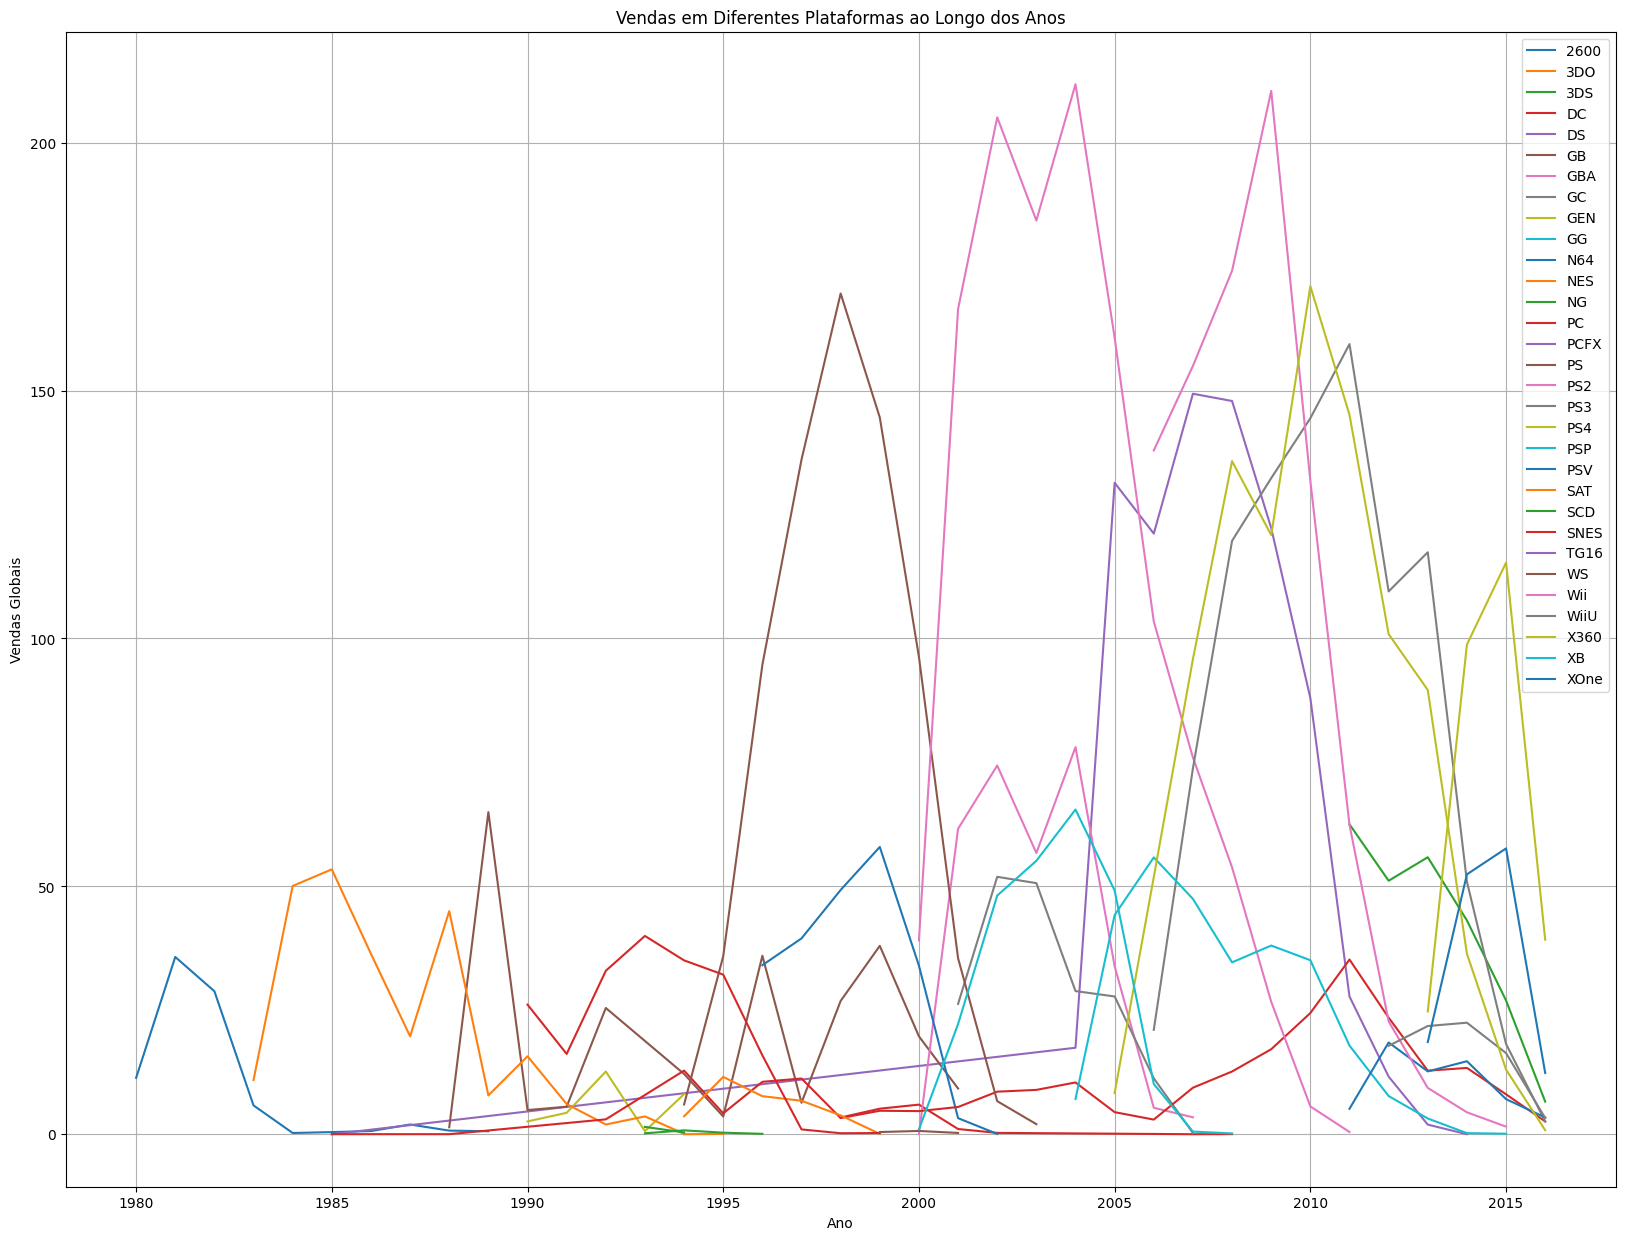

In [61]:
console = console.reset_index() #assim consegui ressetar o index e acessar os dados como coluna.

plt.figure(figsize=(20, 15))

for platform, data in console.groupby('Platform'):
    plt.plot(data['Year'], data['Global_Sales'], label = platform)

plt.xlabel('Ano')
plt.ylabel('Vendas Globais')
plt.title('Vendas em Diferentes Plataformas ao Longo dos Anos')
plt.legend()
plt.grid(True)
plt.show()

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




In [62]:
df['Genre'].unique()

array(['Shooter', 'Misc', 'Fighting', 'Sports', 'Action', 'Platform',
       'Puzzle', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [63]:
generos = pd.DataFrame(df.groupby('Genre')['Global_Sales'].sum())
generos = generos.reset_index()
generos

,Genre,Global_Sales
0,Action,1722.87
1,Adventure,234.80
2,Fighting,444.05
3,Misc,797.62
4,Platform,829.15
5,Puzzle,242.22
6,Racing,726.77
7,Role-Playing,923.80
8,Shooter,1026.20
9,Simulation,390.16


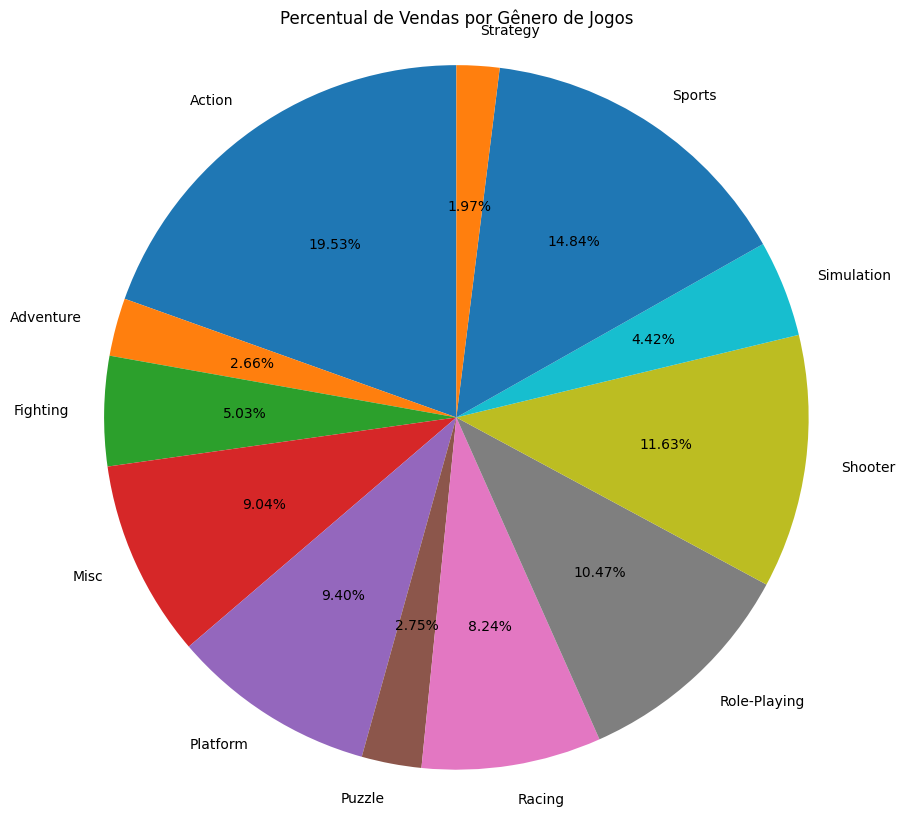

In [64]:
plt.figure(figsize=(10,10))

plt.pie(generos["Global_Sales"],labels = generos["Genre"],autopct = '%1.2f%%',startangle = 90)
plt.title("Percentual de Vendas por Gênero de Jogos")
plt.axis('equal')  # aspecto de círculo


plt.show()

# Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [79]:
livros = pd.read_csv('livros.csv')
livros_genero = pd.read_csv('livros_genero.csv')
livros_classicos = pd.read_csv('livros_classicos.csv')

In [80]:
livros

,nome,paginas
0,livro 1,257
1,livro 2,106
2,livro 3,150
3,livro 4,175
4,livro 5,321
5,livro 6,159
6,livro 7,980
7,livro 8,235
8,livro 9,745
9,livro 10,126


In [81]:
livros_genero.head(3)

,genero,autor
0,Drama,Pedro
1,Aventura,José
2,Drama,Carlos


In [82]:
livros_classicos

,nome,autor
0,livro 1,Jorge
1,livro 2,Santos
2,livro 3,Leandro
3,livro 4,Clara
4,livro 5,Flavia
5,livro 6,Leandro
6,livro 7,Santos
7,livro 8,Marcia
8,livro 9,Marcia
9,livro 10,Clara


Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [69]:
df_concat = pd.concat([livros,livros_genero], axis=1)
df_concat.head(3)

,nome,paginas,genero,autor
0,livro 1,257.0,Drama,Pedro
1,livro 2,106.0,Aventura,José
2,livro 3,150.0,Drama,Carlos


Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [70]:
df_concat[df_concat['nome'].isna()]

,nome,paginas,genero,autor
10,NaN,NaN,Romance,Pedro


Faça a junção das bases de livros e livros clássicos.

In [71]:
df_classicos = livros.merge(livros_classicos, on = 'nome')
df_classicos

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia
5,livro 6,159,Leandro
6,livro 7,980,Santos
7,livro 8,235,Marcia
8,livro 9,745,Marcia
9,livro 10,126,Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [72]:
pd.merge(left = livros, right = livros_classicos, on = "nome", how = "inner")

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia
5,livro 6,159,Leandro
6,livro 7,980,Santos
7,livro 8,235,Marcia
8,livro 9,745,Marcia
9,livro 10,126,Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

In [83]:
livros

,nome,paginas
0,livro 1,257
1,livro 2,106
2,livro 3,150
3,livro 4,175
4,livro 5,321
5,livro 6,159
6,livro 7,980
7,livro 8,235
8,livro 9,745
9,livro 10,126


In [87]:
livros_classicos = livros_classicos.rename(columns={'nome': 'nome_df_classicos'})
livros_classicos

,nome_df_classicos,autor
0,livro 1,Jorge
1,livro 2,Santos
2,livro 3,Leandro
3,livro 4,Clara
4,livro 5,Flavia
5,livro 6,Leandro
6,livro 7,Santos
7,livro 8,Marcia
8,livro 9,Marcia
9,livro 10,Clara


In [88]:
livros_id = pd.merge(livros, livros_classicos, how = 'inner', left_on="nome", right_on ="nome_df_classicos")


livros_id

,nome,paginas,nome_df_classicos,autor
0,livro 1,257,livro 1,Jorge
1,livro 2,106,livro 2,Santos
2,livro 3,150,livro 3,Leandro
3,livro 4,175,livro 4,Clara
4,livro 5,321,livro 5,Flavia
5,livro 6,159,livro 6,Leandro
6,livro 7,980,livro 7,Santos
7,livro 8,235,livro 8,Marcia
8,livro 9,745,livro 9,Marcia
9,livro 10,126,livro 10,Clara


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [ ]:
pd.merge(livros, livros_classicos, how='left', on='nome', validate='1:1')